#### Analyzing ISC markers in fetal stem cells
- **Developed by:** Anna Maguza
- **Affilation:** Faculty of Medicine, Würzburg University
- **Date of creation:** 4th October 2024
- **Last modified date:** 4th October 2024

This notebook is created to analyze the expression of ISC markers in three fetal stem cells populations.

+ Import packages

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

+ Load fetal cells

In [2]:
adata = sc.read_h5ad('data/Fetal_stem_cells_leiden.h5ad')

+ Normalize fetal cells

In [3]:
fetal_adata_log = adata.copy()
sc.pp.normalize_total(fetal_adata_log, target_sum = 1e6, exclude_highly_expressed = True) #1e6 because it is 10X
sc.pp.log1p(fetal_adata_log)

In [4]:
ISC_genes = ['LGR5', 'SMOC2', 'ASCL2', 'AXIN2']

In [5]:
sc.tl.score_genes(fetal_adata_log, gene_list=ISC_genes, score_name='ISC_score')

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=180, figsize=(7,7))
sc.pl.umap(fetal_adata_log, color=['cell_type', 'ISC_score', 'LGR5', 'SMOC2', 'ASCL2', 'AXIN2'], color_map = 'magma_r')

In [22]:
fetal_adata_log

AnnData object with n_obs × n_vars = 7817 × 19868
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels', 'n_genes', 'n_counts', 'leiden', 'cluster', 'cell_type', 'ISC_score'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0', 'n_counts', 'n_cells'
    uns: 'Age_colors', 'Age_group_colors', 'Donor_ID_colors', 'Library_Preparation_Protocol_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'rank_genes_groups', 'umap', 'log1p', 'cell_type_colors', 'Cell Type_colors', 'Study_name_colors', 'Diagnosis_colors', 'Region code_colors', 'Fraction_colors'
  

In [ ]:
sc.set_figure_params(dpi=180, figsize=(7,7))
sc.pl.umap(fetal_adata_log, color=['cell_type', 'Cell Type', 'Study_name', 'Donor_ID', 'Age', 'Region code', 'Fraction', 'Cell States GCA', 'Sex', 'Library_Preparation_Protocol', 'Location', 'Cell States', 'Age_group', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo'], color_map = 'magma_r')


In [6]:
adata.obs['cell_type_age_group'] = adata.obs['cell_type'].astype(str) + '_' + adata.obs['Age_group'].astype(str)

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be igno

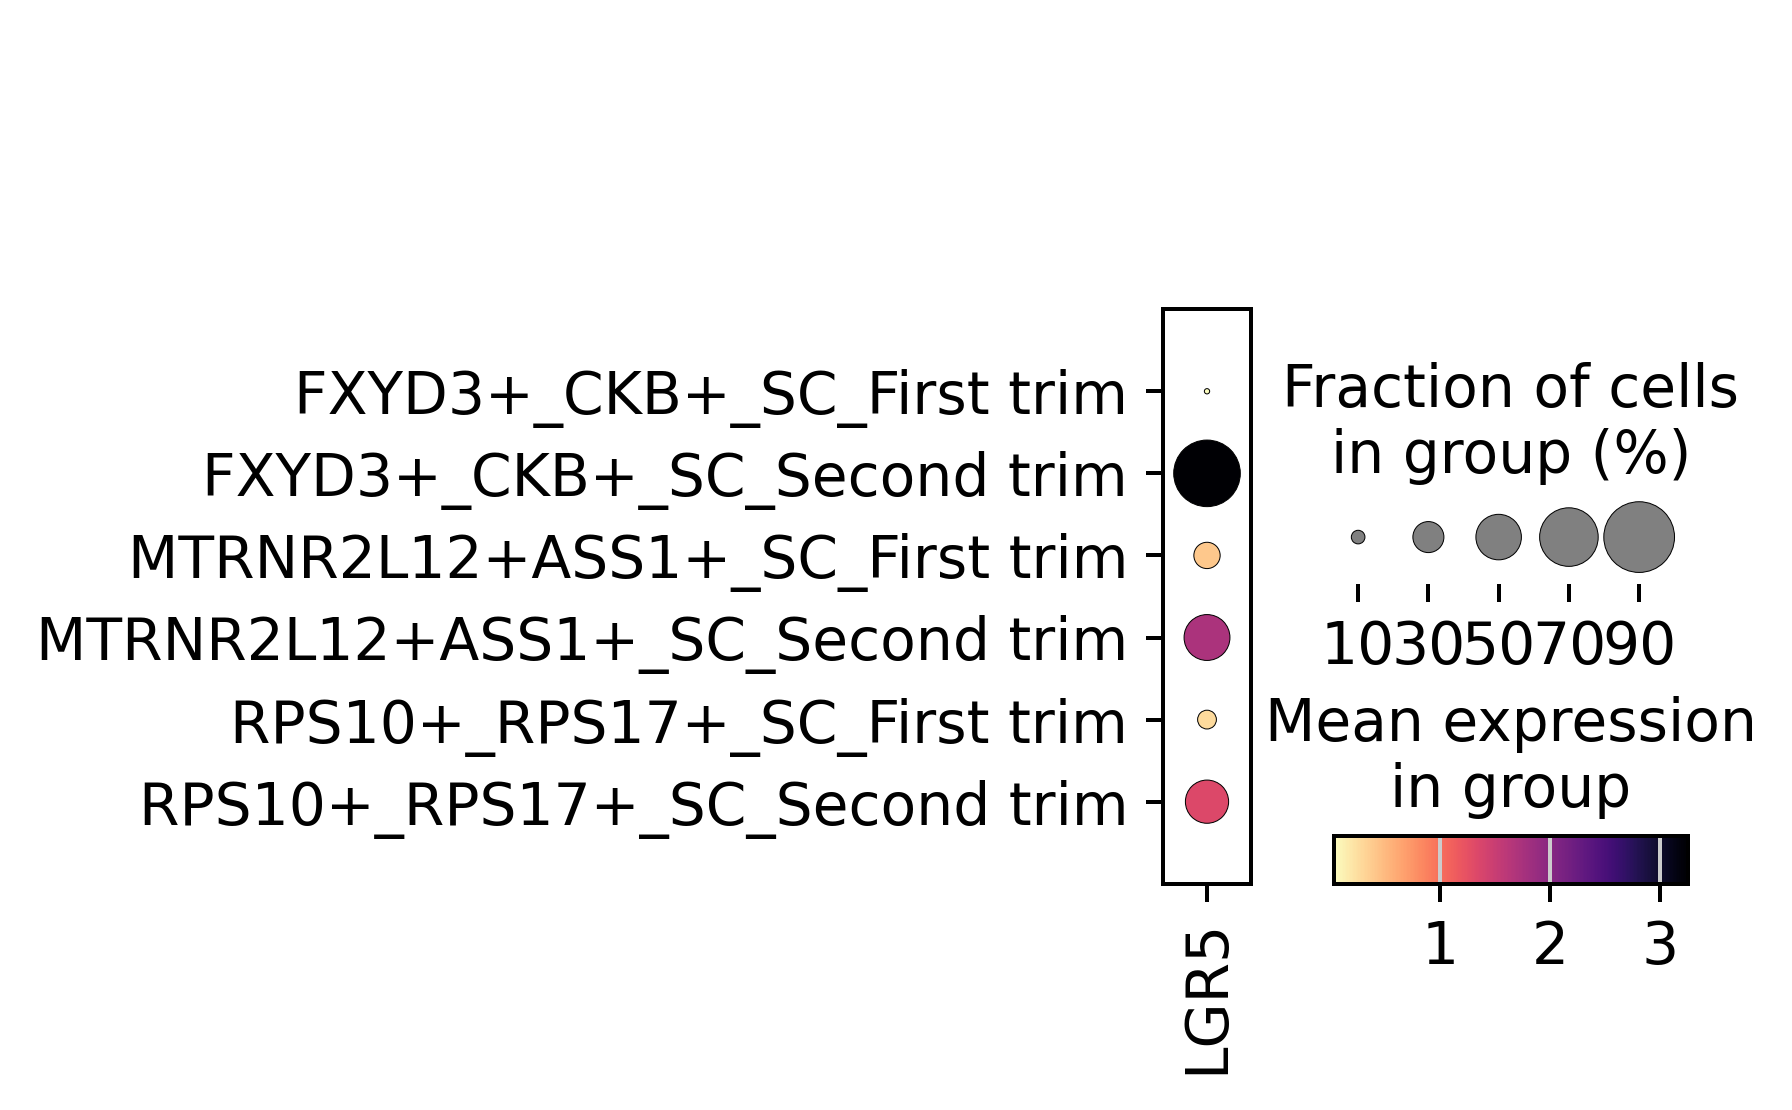

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be igno

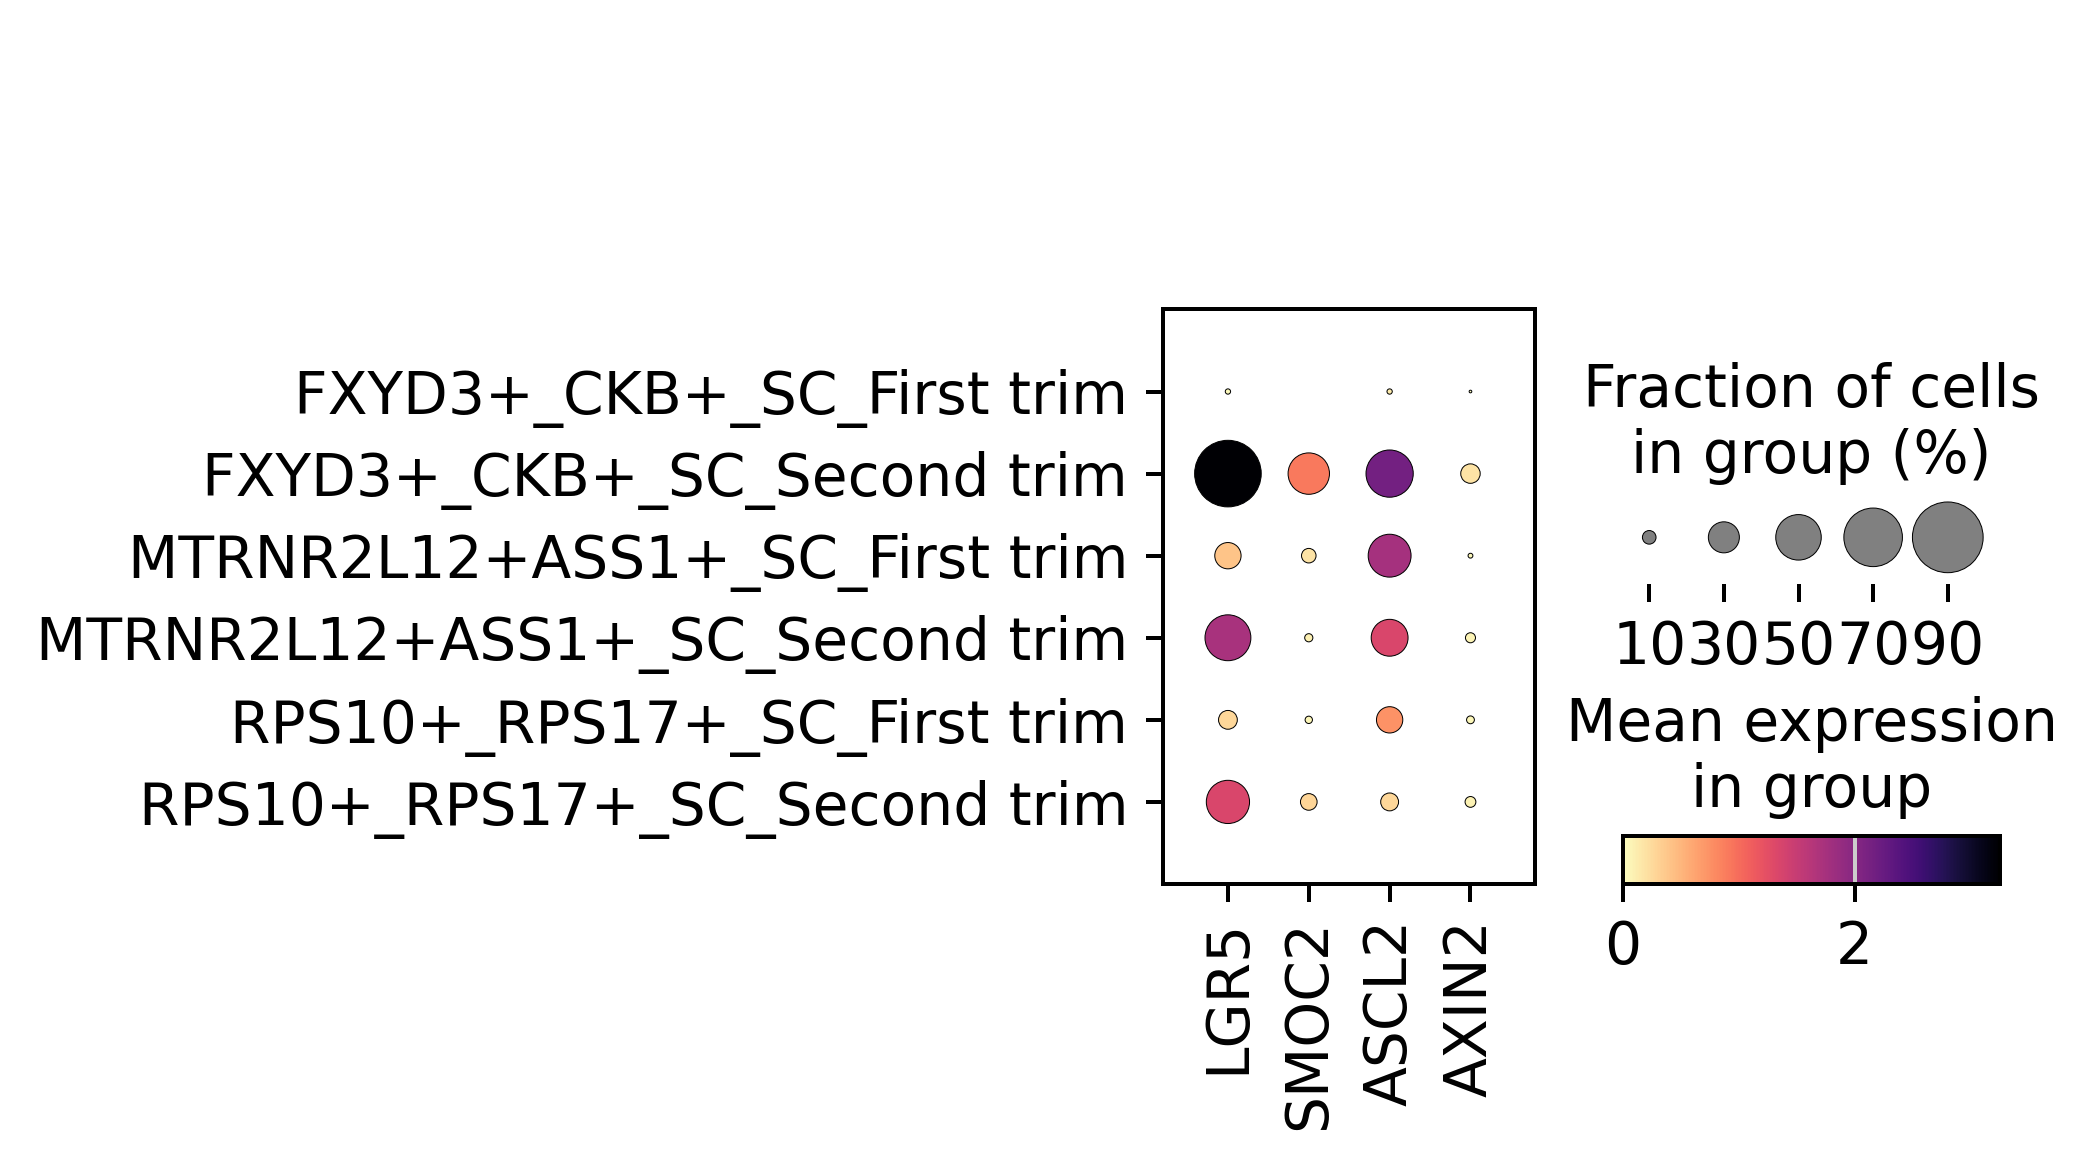

In [11]:
sc.set_figure_params(dpi=180, figsize=(4,4))
sc.pl.dotplot(adata, ['LGR5'], groupby='cell_type_age_group', use_raw=False, color_map='magma_r')
sc.pl.dotplot(adata, ['LGR5', 'SMOC2', 'ASCL2', 'AXIN2'], groupby='cell_type_age_group', use_raw=False, color_map='magma_r')

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/pl

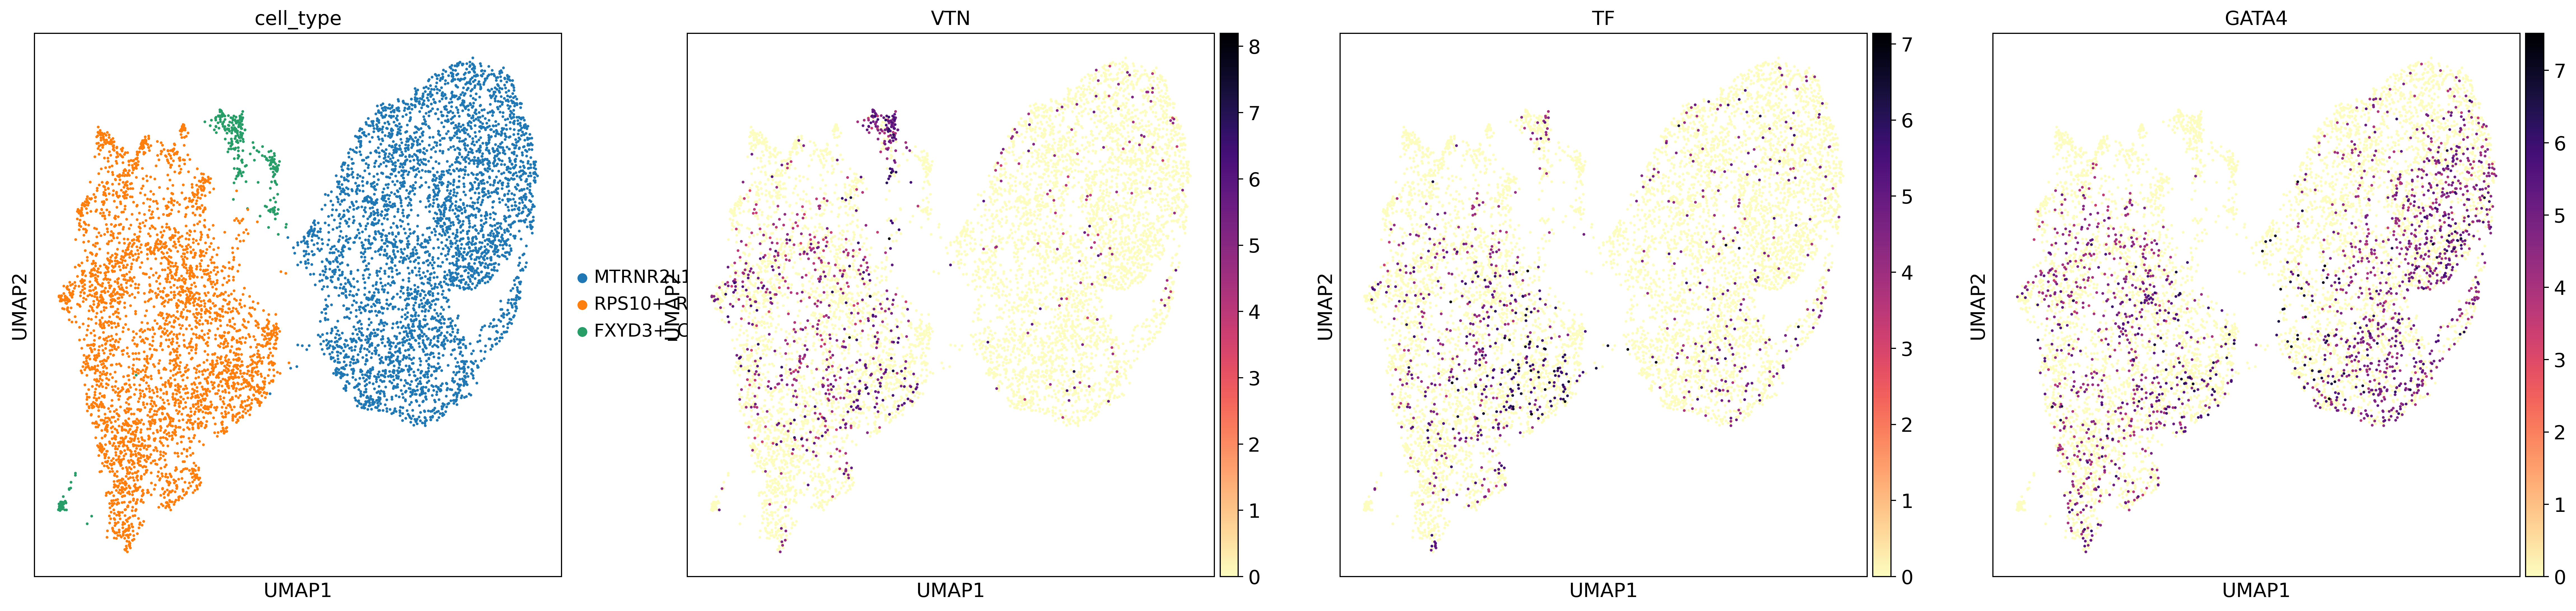

In [10]:
sc.set_figure_params(dpi=180, figsize=(7,7))
sc.pl.umap(fetal_adata_log, color=['cell_type', 'VTN', 'TF', 'GATA4'], color_map = 'magma_r')